# No comments / code are final

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import math

# Movement

In [65]:
movement_data = pd.Series(dtype=float)

movement_data = pd.read_csv("puryear_movement.csv", index_col=0)

print(movement_data)

            Distance walking / running(mi)  Flights climbed(count)  \
Date                                                                 
2020-11-21                           1.023                     5.0   
2020-11-22                           1.202                     2.0   
2020-11-23                           2.455                     8.0   
2020-11-24                           1.165                     4.0   
2020-11-25                           2.444                     3.0   
...                                    ...                     ...   
2021-11-17                           2.624                     7.0   
2021-11-18                           4.532                     7.0   
2021-11-19                           3.492                    10.0   
2021-11-20                           0.507                     4.0   
2021-11-21                           0.004                     NaN   

            Step count(count)  
Date                           
2020-11-21           2471

# Audio
This next part is a bit complicated

format = `%YYYY-%MM-%DD %HH:%MM:%%SS - %YYYY-%MM-%DD %HH:%MM:%%SS,%DB_Val`

In [66]:

audio_data = pd.Series(dtype=float)

audio_data = pd.read_csv("puryear_audio.csv")

# idea for repeating values, find the daily average

audio_data_cleaned = pd.Series(dtype=float)

for i in range(len(audio_data)):
    audio_data_date_string = audio_data.iloc[i]["Date"]
    cropped_audio_date_string = audio_data_date_string[0:19]
    audio_data_cleaned[cropped_audio_date_string] =  audio_data.iloc[i]["Headphone sound levels(dBASPL)"]

audio_data_cleaned.to_csv()
print(audio_data_cleaned)

2020-11-21 00:46:57    55.523
2020-11-21 00:47:48    51.612
2020-11-21 00:48:03    56.874
2020-11-21 11:47:18    57.440
2020-11-21 13:56:45    58.108
                        ...  
2021-11-20 12:33:07    77.055
2021-11-20 12:35:07    60.440
2021-11-20 12:43:06    66.131
2021-11-21 10:11:19    60.938
2021-11-21 10:15:59    58.514
Length: 16294, dtype: float64


Just to save time because that took a while I exported it to a new csv file

In [68]:
audio_data_cleaned.to_csv("temporary_audio.csv")

## Combining the dates of the audio

In [89]:
audio_data_cleaned = pd.read_csv("temporary_audio.csv")
audio_data_cleaned_again = pd.Series(dtype=float)

# finding the average of the daily values
sum = 1
amount = audio_data_cleaned.iloc[0][1]
audio_data_cleaned_prev_date = audio_data_cleaned.iloc[0][0][0:10]

# yes this works!
for i in range(1,len(audio_data_cleaned)):
    audio_data_cleaned_date = audio_data_cleaned.iloc[i][0][0:10]
    if audio_data_cleaned_date == audio_data_cleaned_prev_date: # if this date is the same as the day before do this
        sum = sum + 1
        amount = amount + audio_data_cleaned.iloc[i][1]
    else: # otherwise reset all the values and continue
        sum = 1
        amount = audio_data_cleaned.iloc[i][1]
        audio_data_cleaned_prev_date = audio_data_cleaned.iloc[i][0][0:10]
        audio_data_cleaned_again[audio_data_cleaned_date] = (amount / sum)

    
    


In [90]:
print(audio_data_cleaned_again)

2020-11-22    66.064
2020-11-23    61.650
2020-11-24    54.927
2020-11-25    57.506
2020-11-26    39.405
               ...  
2021-11-17    65.809
2021-11-18    62.816
2021-11-19    57.094
2021-11-20    59.618
2021-11-21    60.938
Length: 363, dtype: float64


<BarContainer object of 363 artists>

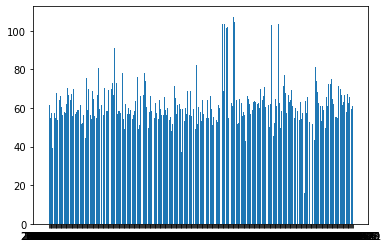

In [95]:
# for fun lets graph it
plt.bar(audio_data_cleaned_again.index, audio_data_cleaned_again)

### I decided to make a function that combines the days

In [105]:
def combine_days_in_ser(original_series):
    # finding the average of the daily values
    sum = 1
    amount = original_series.iloc[0][1]
    prev_date = original_series.iloc[0][0][0:10]

    cleaned_series = pd.Series(dtype=float)

    # yes this works!
    for i in range(1,len(audio_data_cleaned)):
        original_series_date = original_series.iloc[i][0][0:10]
        if original_series_date == prev_date: # if this date is the same as the day before do this
            sum = sum + 1
            amount = amount + original_series.iloc[i][1]
        else: # otherwise reset all the values and continue
            sum = 1
            amount = original_series.iloc[i][1]
            prev_date = audio_data_cleaned.iloc[i][0][0:10]
            cleaned_series[original_series_date] = amount

    return cleaned_series

# Sleep

Format = `%YYYY-%MM-%DD %HH:%MM:%%SS - %YYYY-%MM-%DD %HH:%MM:%%SS,%DB_Val`

In [133]:
sleep_data = pd.Series(dtype=float)

sleep_data = pd.read_csv("puryear_in_bed.csv")

# i notice how whenever there is a super small one, its always after a longer one.
# my theory is that that is when i actually pick up my phone first, but then i put it down.
# maybe i hit snooze

# first thing i am going to do is see if i can get the first value before the -, i feel like the stuff after the dash is not needed since we will have the value

# print(sleep_data)

sleep_data_cleaned = pd.Series(dtype=float)
# print(sleep_data)

for i in range(len(sleep_data)):
    current_date_string = sleep_data.iloc[i]["Date"]
    cropped_date_string = current_date_string[0:19]
    sleep_data_cleaned[cropped_date_string] =  sleep_data.iloc[i]["Time in bed(hr)"]

# i am just going to drop the time if it is less than 0.5 hours (half an hour)
sleep_data_cleaned = sleep_data_cleaned[sleep_data_cleaned>0.5]

# this will also make it possible for me to have all nighters when in reality i didnt
# i also specifically remember times where it said that i pulled all nighters when i just fell asleep with youtube playing

# idea
# combine all values that have the same day
    # issue, if i went to bed at 2am on a certain day, then went to bed at 11pm that same day. Then we have a problem

print(sleep_data_cleaned)

2020-11-21 01:22:35    6.314
2020-11-23 01:37:06    6.531
2020-11-24 03:11:00    4.332
2020-11-25 01:00:31    6.544
2020-11-26 00:48:07    8.158
                       ...  
2021-11-18 00:00:00    4.149
2021-11-18 04:20:48    2.661
2021-11-19 00:00:00    7.006
2021-11-20 02:08:53    4.853
2021-11-21 00:00:00    6.994
Length: 375, dtype: float64


In [108]:
print(combine_days_in_ser(sleep_data_cleaned))

IndexError: invalid index to scalar variable.